In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [3]:
salary=pd.read_csv("Salary.csv")

In [4]:
salary.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [5]:
salary.shape

(2639, 13)

In [6]:
salary.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [7]:
salary.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [8]:
salary.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

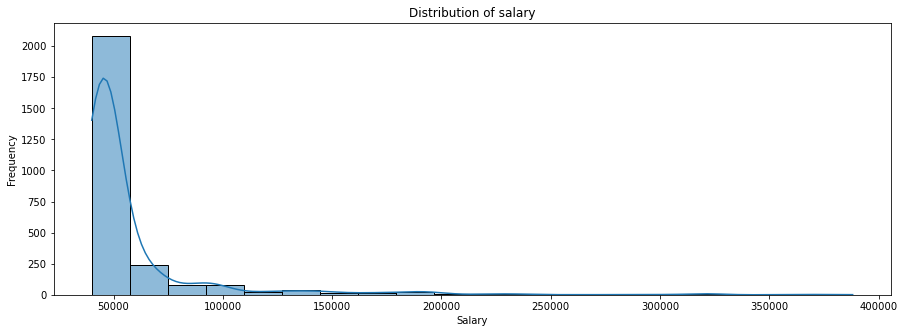

In [9]:
plt.figure(figsize=(15,5))
sns.histplot(salary['SALARY'],bins=20,kde=True)
plt.title("Distribution of salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

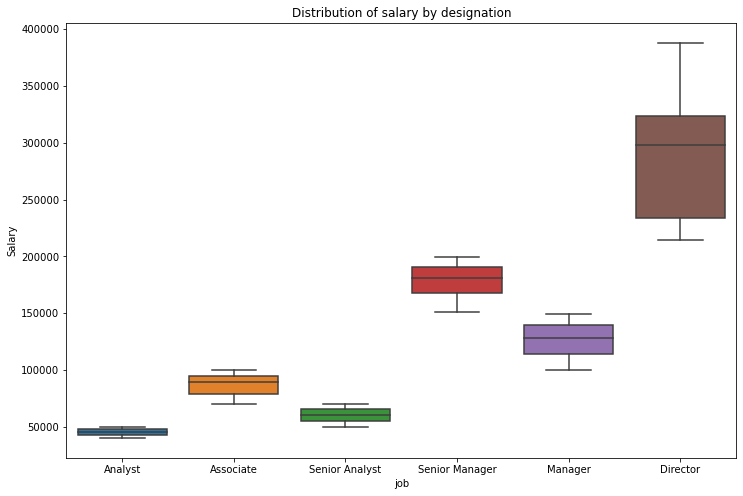

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x='DESIGNATION',y='SALARY',data=salary)
plt.title("Distribution of salary by designation")
plt.xlabel('job')
plt.ylabel('Salary')
plt.show()

                       AGE    SALARY  LEAVES USED  LEAVES REMAINING   RATINGS  \
AGE               1.000000  0.872213     0.007825         -0.006515  0.036801   
SALARY            0.872213  1.000000     0.006498         -0.005422  0.020248   
LEAVES USED       0.007825  0.006498     1.000000         -1.000000  0.002200   
LEAVES REMAINING -0.006515 -0.005422    -1.000000          1.000000 -0.003415   
RATINGS           0.036801  0.020248     0.002200         -0.003415  1.000000   
PAST EXP          0.903926  0.854046     0.008601         -0.006728  0.040123   

                  PAST EXP  
AGE               0.903926  
SALARY            0.854046  
LEAVES USED       0.008601  
LEAVES REMAINING -0.006728  
RATINGS           0.040123  
PAST EXP          1.000000  


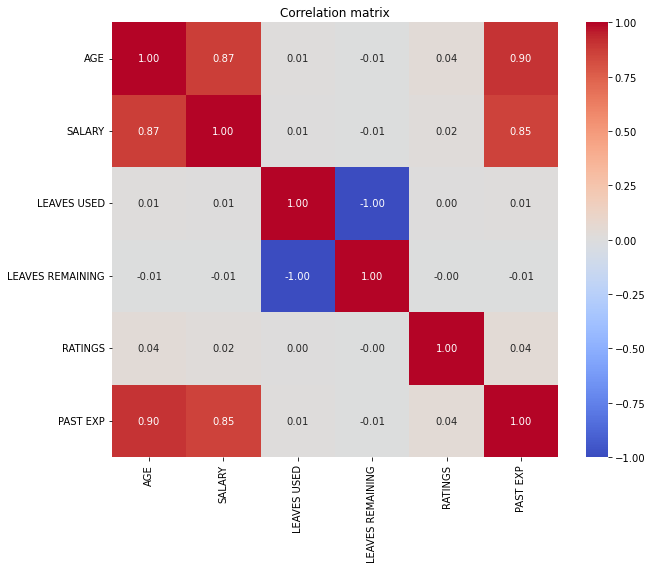

In [11]:
correlation_matrix=salary.corr()
print(correlation_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

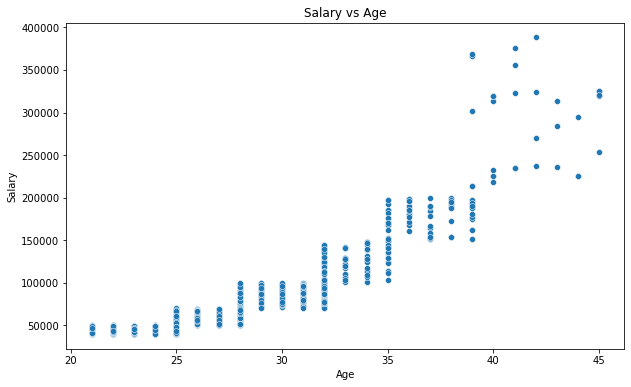

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SALARY', data=salary)
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [13]:
z_scores=stats.zscore(salary["SALARY"])
# print(z_scores)
threshold = 3

# Identify outliers
outliers = salary[abs(z_scores) > threshold]

print("Outliers detected:")
print(outliers)

Outliers detected:
     FIRST NAME    LAST NAME SEX         DOJ CURRENT DATE     DESIGNATION  \
41    CHRISTINE     ALPHONSE   F   8-26-2011   01-07-2016  Senior Manager   
73     SAVANNAH        APREA   F  12-20-2011   01-07-2016  Senior Manager   
114       ALLAN       ACEVES   M  04-09-2013   01-07-2016  Senior Manager   
160      NICOLE    ALSOBROOK   F   6-27-2010   01-07-2016        Director   
166       DEREK   ABOULISSAN   M   2-13-2013   01-07-2016        Director   
...         ...          ...  ..         ...          ...             ...   
2546   ADELAIDE    ARCHIBOLD   F  11-11-2010   01-07-2016        Director   
2575    SABRINA    AMEZQUITA   F   7-23-2012   01-07-2016  Senior Manager   
2584    KRISTAL       ARMOLD   F  01-05-2013   01-07-2016  Senior Manager   
2595      JAMIE  ALUMMOOTTIL   F  09-11-2010   01-07-2016  Senior Manager   
2634  KATHERINE       ALSDON   F   6-28-2011   01-07-2016  Senior Manager   

       AGE  SALARY        UNIT  LEAVES USED  LEAVES REMA

In [19]:
#feature Engineering
salary["DOJ"]=pd.to_datetime(salary['DOJ'])

In [24]:
salary["Years of Experience"]=(salary["CURRENT DATE"]-salary["DOJ"]).dt.days/365
salary["Years of Experience"]

TypeError: cannot subtract DatetimeArray from ndarray

In [21]:
sal_encod=pd.get_dummies(salary,columns=["SEX","DESIGNATION","UNIT"],drop_first=True)
sal_encod

,FIRST NAME,LAST NAME,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,...,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,TOMASA,ARMEN,2014-05-18,01-07-2016,21.0,44570,24.0,6.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,ANNIE,NaN,NaT,01-07-2016,NaN,89207,NaN,13.0,NaN,7,...,1,0,0,0,0,0,0,0,0,1
2,OLIVE,ANCY,2014-07-28,01-07-2016,21.0,40955,23.0,7.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHERRY,AQUILAR,2013-04-03,01-07-2016,22.0,45550,22.0,8.0,3.0,0,...,0,0,0,0,0,1,0,0,0,0
4,LEON,ABOULAHOUD,2014-11-20,01-07-2016,NaN,43161,27.0,3.0,NaN,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,2011-06-28,01-07-2016,36.0,185977,15.0,15.0,5.0,10,...,0,0,0,0,1,0,1,0,0,0
2635,LOUISE,ALTARAS,2014-01-14,01-07-2016,23.0,45758,17.0,13.0,2.0,0,...,0,0,0,0,0,1,0,0,0,0
2636,RENEE,ALVINO,2014-01-23,01-07-2016,21.0,47315,29.0,1.0,5.0,0,...,0,0,0,0,0,0,0,0,0,1
2637,TERI,ANASTASIO,2014-03-17,01-07-2016,24.0,45172,23.0,7.0,3.0,1,...,0,0,0,0,0,0,0,0,0,1


In [22]:
salary['RATING_EXP_INTERACTION'] = salary['RATINGS'] * salary['PAST EXP']

In [23]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
salary_scaled = sal_encod.copy()  # Create a copy of the DataFrame
salary_scaled[['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'PAST EXP']] = scaler.fit_transform(salary[['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'PAST EXP']])


scaler=MinMaxScaler()
salary_scaled=salary_scaled.copy()
salary_scaled[['AGE', 'SALARY', 'Years of Experience']] = scaler.fit_transform(salary_scaled[['AGE', 'SALARY', 'Years of Experience']])

KeyError: "['Years of Experience'] not in index"

In [ ]:
# Bin ages into categories
bins = [0, 30, 40, 50, float('inf')]
labels = ['<30', '30-40', '40-50', '50+']
salary['AGE_GROUP'] = pd.cut(salary['AGE'], bins=bins, labels=labels)

In [ ]:
# Calculate average salary by job role
avg_salary_by_role = salary.groupby('DESIGNATION')['SALARY'].mean().reset_index()
avg_salary_by_role.columns = ['DESIGNATION', 'AVG_SALARY_BY_ROLE']
salary = pd.merge(salary, avg_salary_by_role, on='DESIGNATION', how='left')

In [ ]:
salary_scaled.head()

In [ ]:
salary.dropna(subset=['LAST NAME'],inplace=True)

In [ ]:
missing=salary.isnull()
for i in missing:
    print(missing[i].value_counts())
    print(" ")

In [ ]:
salary.drop_duplicates()

In [ ]:
salary["DOJ"].dtype
salary["CURRENT DATE"]=pd.to_datetime(salary["CURRENT DATE"])
salary["CURRENT DATE"].dtype

In [ ]:
salary.replace('NaN',np.nan,inplace=True)
salary['RATINGS'].unique()
salary["RATINGS"].median()
salary['RATINGS'].value_counts() #to see the occuring of a number in the column
modee=salary['RATINGS'].mode()[0] 
# salary['RATINGS']=salary['RATINGS'].fillna(modee)
salary['RATINGS'].replace({np.nan:modee},inplace=True)

In [ ]:
print(salary['RATINGS'])

In [ ]:
salary['LEAVES USED'].value_counts()
med=salary['LEAVES USED'].median()
salary['LEAVES USED'].replace(np.nan,med,inplace=True)

In [ ]:
salary['AGE'].value_counts()
mode_age=salary["AGE"].mode()[0]
salary["AGE"].replace(np.nan,mode_age,inplace=True)

In [ ]:
salary['LEAVES REMAINING'].value_counts()
# mode_age=salary["LEAVES REMAINING"].mode()[0]
# salary["LEAVES REMAINING"].replace(np.nan,mode_age,inplace=True)

In [ ]:
salary.head(20)
# types={
#     'SEX_M'     : int,                            
# 'DESIGNATION_Associate '  :int,              
# 'DESIGNATION_Senior Analyst'   : int,        
# 'UNIT_IT'                            : int, 
# 'UNIT_Management'              : int,
# 'UNIT_Marketing'               : int,    
# 'UNIT_Operations'              : int ,     
# 'UNIT_Web'  : int
    
# }
# #salary_scaled=salary_scaled["SEX_M"].astype(int)
# salary_scaled=salary_scaled.astype(types)

In [ ]:
salary_scaled.columns

In [ ]:
columns_to_drop = ['FIRST NAME', 'LAST NAME', 'SALARY','AGE_GROUP']
X = salary_scaled.drop(columns=columns_to_drop, axis=1)
X = salary['Years of Experience']
X=X.values.reshape(-1,1)
y = salary_scaled['SALARY']

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_model=LinearRegression()

linear_model.fit(X_train,y_train)

In [ ]:
y_predict=linear_model.predict(X_test)

In [ ]:
# Scatter plot of the original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Plotting the regression line
X_line = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # Generating points for the regression line
y_line = linear_model.predict(X_line)
plt.plot(X_line, y_line, color='red', label='Regression Line')

# Scatter plot of the test data points and their predictions
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_predict, color='orange', label='Predictions on Test Data', marker='x')

# Highlight the new prediction
# plt.scatter(new_point, new_prediction, color='purple', label=f'Prediction for X=20: {new_prediction[0][0]}')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train models and store them in a dictionary
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f'{name} model trained.')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
decision_tree_pred = decision_tree_reg.predict(X_test)

# Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)
random_forest_pred = random_forest_reg.predict(X_test)

# Gradient Boosting Regression
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
gradient_boosting_reg.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_reg.predict(X_test)

# Evaluate the models
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = mean_squared_error(true, pred, squared=False)
    r2 = r2_score(true, pred)
    return mae, mse, rmse, r2

models = {
    'Linear Regression': linear_reg_pred,
    'Decision Tree': decision_tree_pred,
    'Random Forest': random_forest_pred,
    'Gradient Boosting': gradient_boosting_pred
}

for name, pred in models.items():
    mae, mse, rmse, r2 = evaluate_model(y_test, pred)
    print(f"{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")


In [ ]:
X=np.array([[1],[2],[3],[4],[5],[6],[7],[8]])
Y=np.array([[2],[4],[6],[8],[10],[12],[14],[16]])

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model1=LinearRegression()
model1.fit(X_train,y_train)
y_prediction=model1.predict(X_test)
pr=model1.predict(np.array([[20]]))
pr

In [ ]:
y_prediction=model1.predict(X_test)
pr=model1.predict(np.array([[20]]))
pr

In [ ]:
y_prediction
# X_test
mse=mean_squared_error(y_test,y_prediction)
mse